<a href="https://colab.research.google.com/github/andreidore/aicrowd/blob/master/blitz_3/snake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tqdm

In [21]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers , models
from tensorflow.keras.layers.experimental import preprocessing


In [3]:
print(tf.test.is_gpu_available("GPU"))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [4]:
!wget -q https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/snake/v0.1/train.zip
!wget -q https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/snake/v0.1/val.zip
!wget -q https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/snake/v0.1/test.zip

!wget -q https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/snake/v0.1/sample_submission.csv


!mkdir data
!mkdir data/test
!mkdir data/train
!mkdir data/val

!unzip -q train.zip
!unzip -q test.zip
!unzip -q val.zip


!mv content/data/train/* data/train
!mv content/data/val/* data/val
!mv content/data/test/* data/test


!rm -rf content/


!mkdir models

In [14]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
SEED=1000

In [15]:


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/train",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data/val",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

Found 53723 files belonging to 2 classes.
Found 5967 files belonging to 2 classes.


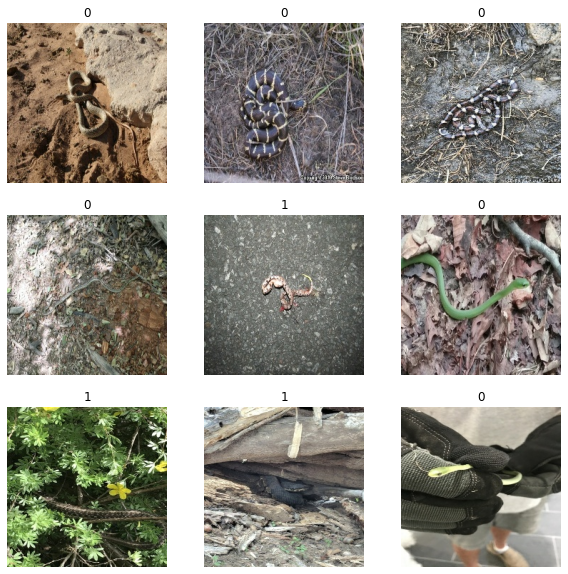

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# Data Augmentation

In [49]:
img_augmentation = models.Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        #preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        #preprocessing.RandomContrast(factor=0.05),
    ],
    name="img_augmentation",
)

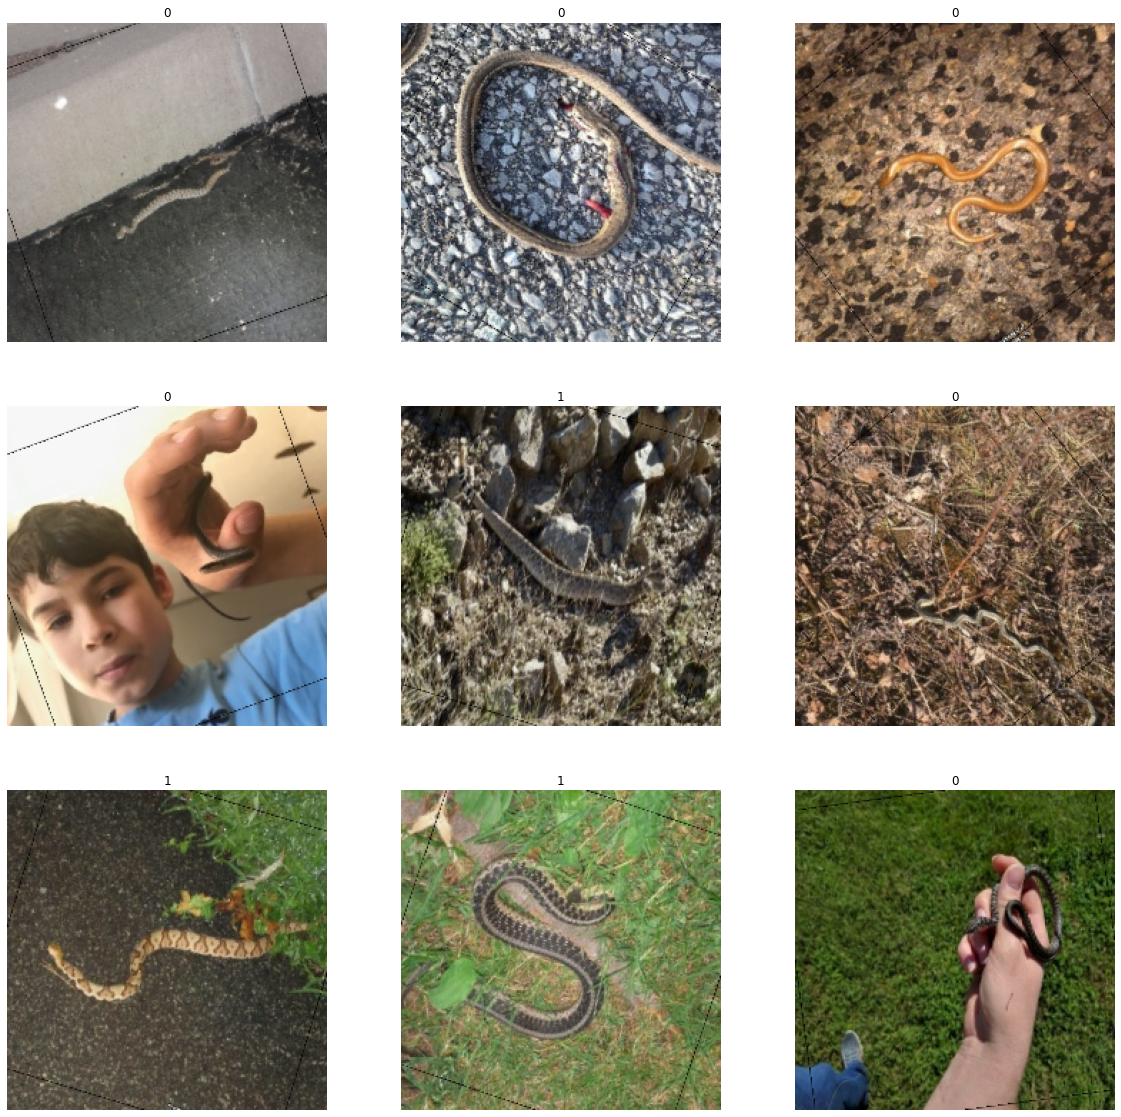

In [50]:
plt.figure(figsize=(20, 20))
for image, label in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        #print(type(image[0]))
        #aug_img = img_augmentation(tf.expand_dims(image, axis=0))
        aug_img = img_augmentation(tf.expand_dims(image[i], axis=0))
        plt.imshow(aug_img[0].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
def input_preprocess(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

train_ds = train_ds.map(input_preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_ds = train_ds.batch(batch_size=BATCH_SIZE, drop_remainder=True)
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

val_ds = val_ds.map(input_preprocess)
val_ds = val_ds.batch(batch_size=BATCH_SIZE, drop_remainder=True)